In [3]:
#Template
import pandas as pd
import numpy as np
import json
import requests
# from time import mktime
import os
# import pandas_gbq
# from oauth2client.service_account import ServiceAccountCredentials
import time
# import pymysql
# from google.oauth2 import service_account
# import gspread
# from apiclient import discovery
import string
# import base64
# import pickle
# from pyArango.connection import Connection
# import pygsheets
import re
from datetime import datetime, timedelta
from askquinta import About_ArangoDB, About_BQ, About_MySQL, About_Gsheet

pd.set_option('display.float_format', lambda x: '%.2f' % x)
datenow = datetime.strftime(datetime.now(),"%Y-%m-%d")


#------------------------

In [4]:
# For Display Max Column or Rows
pd.set_option('display.max_column', None)
# pd.set_option('display.max_rows', None)

In [5]:
# Library for ML
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from scipy.stats import ks_2samp

# feature engineering
from sklearn.feature_selection import RFE, f_classif, SelectKBest, mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import pickle
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


import plotly.express as px

# Cross Validation 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report

# Gather Data from Bigquery and Sheets

In [22]:
# Getting  Data from Sheets

data = Gsheet.to_pull_data("List of Quality Users","Training Data 3")
df1 = data[['company_id','Quality Level']].copy()
df1 = df1.rename(columns={'Quality Level':'quality_level'})
df1 = df1[(df1['quality_level']!='')]



In [21]:
df1[(df1['quality_level']!='')]

,company_id,quality_level
0,4b2e3b4b-70d7-4db3-8fd6-c8160bbdc9aa,High
1,dd33dd3b-6516-48f7-9fd3-3fa15f353e28,High
2,6c0a46aa-0ee2-4c1f-a5c5-5cdd3910f3a7,High
3,7faf9b15-5df3-4e04-b3b5-da46236198bf,High
4,c1271a80-4c54-11e9-bc6a-4f4995e8c05d,High
...,...,...
342,02a6fae5-b8a6-497d-a0ad-ee526e033346,Low
343,029f4fe1-53ec-40b9-b870-9f601f01fd0d,Low
344,02b91ba6-654b-46a7-80eb-9aaa6f6acf10,High
345,02d1cac0-e011-11e9-9801-690896c544dd,High


In [23]:
# Getting Data from Bigquery
query = """
SELECT
        *
FROM datascience_public.fact__smb__quality_users_temp
WHERE company_id IN {}
""".format(tuple(df1['company_id'].unique()))

df2 = BQ.to_pull_data(query)
df2.head()

Downloading: 100%|██████████| 329/329 [00:00<00:00, 400.63rows/s]


,company_id,company_name,company_type_group,company_created_date,company_registered_date,company_age_days,company_kyc_status_name,have_subscription,sales_invoice_count,sales_receipt_count,sales_order_count,delivery_order_count,sales_invoice_normalized_rate,purchase_invoice_count,purchase_receipt_count,purchase_order_count,good_receipt_count,purchase_invoice_normalized_rate,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,reconciled_pi_rate,si_biggest_distribution,pi_biggest_distribution,sales_invoice_other_template_count,invoice_logo_count,scheduler_count,partner_invoice_count,si_send_rate,last_created_invoice_date,last_created_payment_date,last_created_order_date,last_created_partner_date,last_created_product_date,referral_used_count,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate
0,00cd5011-0f51-4695-8210-d901bc666c80,BlessCollection.,perorangan,2023-12-21,2023-12-21,103,validasi_berhasil,1,0.00,nan,nan,nan,0.00,1.00,nan,nan,nan,1.00,0.00,nan,0.00,0.00,nan,0.00,1.00,0.00,0.00,nan,1.00,0.00,2024-01-17,NaT,NaT,2024-03-18,NaT,0.00,1.00,1.00,0.00,1.00
1,01920c43-77f2-4e5b-a58f-6db7761663b3,sinar mandiri pratama,cv,2023-12-21,2023-12-21,103,belum_validasi,1,5.00,2.00,nan,nan,1.25,1.00,1.00,nan,nan,1.00,0.33,0.00,0.00,0.40,0.00,1.00,1.00,0.00,0.00,nan,1.00,1.00,2024-03-26,2024-02-26,NaT,2023-12-23,2024-03-26,0.00,0.00,nan,1.00,0.00
2,0748e558-c27c-4e9a-89e6-f15b546d1471,PT. SINAR OGAN INDUSTRI,pt,2023-10-12,2023-12-22,102,validasi_berhasil,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-01-07,NaT,0.00,1.00,1.00,0.00,1.00
3,e0bbc73d-ebd2-48b9-9e4a-eaf458efc96b,Mrs. Kathleen Linney Margiano,perorangan,2023-04-10,2023-04-11,357,validasi_berhasil,1,28.00,27.00,nan,nan,1.08,1.00,1.00,nan,nan,1.00,0.03,0.00,0.04,0.96,0.00,0.18,1.00,0.00,0.00,nan,18.00,1.00,2024-03-24,2024-03-24,NaT,2024-03-24,2023-09-16,0.00,0.00,nan,1.00,0.00
4,0c07c839-f570-4391-800d-3b3fa96698d7,Eat Alinea,perorangan,2023-04-11,2023-04-11,357,validasi_berhasil,1,5688.00,5424.00,nan,0.00,20.91,1.00,0.00,nan,0.00,1.00,1.00,0.03,0.44,0.75,0.00,0.01,1.00,0.00,5688.00,nan,2463.00,1.00,2024-04-01,2024-04-01,NaT,2024-04-01,2024-03-12,1.00,0.00,1.00,1.00,0.00


In [24]:
df = df1.merge(df2, how='inner', on='company_id')
df = df.rename(columns={'company_type':'company_type_group','kyc_status':'company_kyc_status_name'}).copy()
df.head()

,company_id,quality_level,company_name,company_type_group,company_created_date,company_registered_date,company_age_days,company_kyc_status_name,have_subscription,sales_invoice_count,sales_receipt_count,sales_order_count,delivery_order_count,sales_invoice_normalized_rate,purchase_invoice_count,purchase_receipt_count,purchase_order_count,good_receipt_count,purchase_invoice_normalized_rate,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,reconciled_pi_rate,si_biggest_distribution,pi_biggest_distribution,sales_invoice_other_template_count,invoice_logo_count,scheduler_count,partner_invoice_count,si_send_rate,last_created_invoice_date,last_created_payment_date,last_created_order_date,last_created_partner_date,last_created_product_date,referral_used_count,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate
0,4b2e3b4b-70d7-4db3-8fd6-c8160bbdc9aa,High,Lien Sacre,perorangan,2024-01-17,2024-01-17,76,akun_dibekukan,1,245.00,240.00,nan,nan,6.45,1.00,0.00,nan,nan,1.00,0.00,nan,0.01,0.98,0.00,0.08,1.00,0.00,0.00,nan,86.00,1.00,2024-03-27,2024-03-27,NaT,2024-03-26,NaT,0.00,0.05,1.00,0.95,0.05
1,dd33dd3b-6516-48f7-9fd3-3fa15f353e28,High,PD Jaya Motor,perorangan,2024-01-02,2024-01-02,91,validasi_berhasil,1,1.00,1.00,nan,nan,1.00,127.00,128.00,nan,nan,2.31,0.00,nan,0.00,1.00,0.00,1.00,0.14,0.00,0.00,nan,48.00,1.00,2024-04-01,2024-04-01,NaT,2024-03-25,NaT,0.00,0.00,0.00,0.01,0.99
2,6c0a46aa-0ee2-4c1f-a5c5-5cdd3910f3a7,High,OCULUSPHOTO STUDIO GALUHMAS,perorangan,2022-01-03,2022-01-03,820,belum_validasi,1,11286.00,13012.00,1.00,nan,26.25,0.00,0.00,0.00,nan,0.00,1.00,0.00,0.11,0.03,0.00,0.00,0.00,0.00,9072.00,nan,10719.00,0.01,2024-03-03,2024-03-03,2022-08-10,2024-03-03,2023-08-18,0.00,nan,nan,nan,nan
3,6c0a46aa-0ee2-4c1f-a5c5-5cdd3910f3a7,High,OCULUSPHOTO STUDIO GALUHMAS,perorangan,2022-01-03,2022-01-03,820,belum_validasi,1,11286.00,13012.00,1.00,nan,26.25,0.00,0.00,0.00,nan,0.00,1.00,0.00,0.11,0.03,0.00,0.00,0.00,0.00,9072.00,nan,10719.00,0.01,2024-03-03,2024-03-03,2022-08-10,2024-03-03,2023-08-18,0.00,nan,nan,nan,nan
4,7faf9b15-5df3-4e04-b3b5-da46236198bf,High,Beverly Florist,perorangan,2023-04-27,2023-04-27,341,validasi_berhasil,1,7901.00,8670.00,nan,nan,41.80,1.00,1.00,nan,nan,1.00,0.24,0.00,0.25,0.36,0.00,0.00,1.00,0.00,7901.00,nan,6268.00,1.00,2023-11-02,2024-01-08,NaT,2023-11-02,2023-04-28,0.00,0.00,0.67,1.00,0.00


In [25]:
# Getting Data Details
print(df.info())
print(df.shape)
print('Data contains %.f rows and %.f columns' %(df.shape[0], df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 342
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   company_id                          343 non-null    object        
 1   quality_level                       343 non-null    object        
 2   company_name                        343 non-null    object        
 3   company_type_group                  343 non-null    object        
 4   company_created_date                343 non-null    datetime64[ns]
 5   company_registered_date             343 non-null    datetime64[ns]
 6   company_age_days                    343 non-null    int64         
 7   company_kyc_status_name             331 non-null    object        
 8   have_subscription                   343 non-null    int64         
 9   sales_invoice_count                 309 non-null    float64       
 10  sales_receipt_count       

In [26]:
df.describe()

,company_age_days,have_subscription,sales_invoice_count,sales_receipt_count,sales_order_count,delivery_order_count,sales_invoice_normalized_rate,purchase_invoice_count,purchase_receipt_count,purchase_order_count,good_receipt_count,purchase_invoice_normalized_rate,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,reconciled_pi_rate,si_biggest_distribution,pi_biggest_distribution,sales_invoice_other_template_count,invoice_logo_count,scheduler_count,partner_invoice_count,si_send_rate,referral_used_count,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate
count,343.00,343.00,309.00,299.00,104.00,77.00,309.00,309.00,299.00,104.00,77.00,309.00,309.00,191.00,309.00,301.00,304.00,309.00,309.00,309.00,310.00,6.00,309.00,309.00,338.00,265.00,191.00,265.00,265.00
mean,557.32,0.99,747.74,730.88,268.11,6.82,2.91,109.16,93.97,36.90,0.00,1.55,0.35,0.26,0.27,0.37,0.03,0.38,0.41,286.81,606.16,6.33,288.81,0.52,0.65,0.43,0.75,0.45,0.55
std,492.05,0.09,2444.33,2502.52,932.82,41.48,5.36,858.00,568.80,199.78,0.00,4.62,0.42,0.40,0.34,0.37,0.14,0.37,0.41,1677.81,2129.90,3.72,1322.97,0.46,6.31,0.43,0.36,0.45,0.45
min,42.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,215.00,1.00,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,3.75,3.00,0.00,0.00,0.00,0.56,0.00,0.00
50%,379.00,1.00,28.00,22.00,2.00,0.00,1.33,2.00,1.00,1.00,0.00,1.00,0.02,0.00,0.09,0.26,0.00,0.23,0.30,0.00,4.50,6.00,9.00,0.56,0.00,0.24,0.98,0.18,0.82
75%,797.00,1.00,233.00,148.00,31.50,0.00,2.43,18.00,17.00,2.25,0.00,1.50,0.85,0.55,0.50,0.71,0.00,0.69,0.82,1.00,117.00,8.25,52.00,1.00,0.00,0.90,1.00,1.00,1.00
max,2425.00,1.00,25151.00,25954.00,5814.00,327.00,45.44,14300.00,8104.00,1804.00,0.00,65.60,1.00,1.00,1.00,1.00,1.00,1.00,1.00,25110.00,23862.00,12.00,11896.00,1.00,114.00,1.00,1.00,1.00,1.00


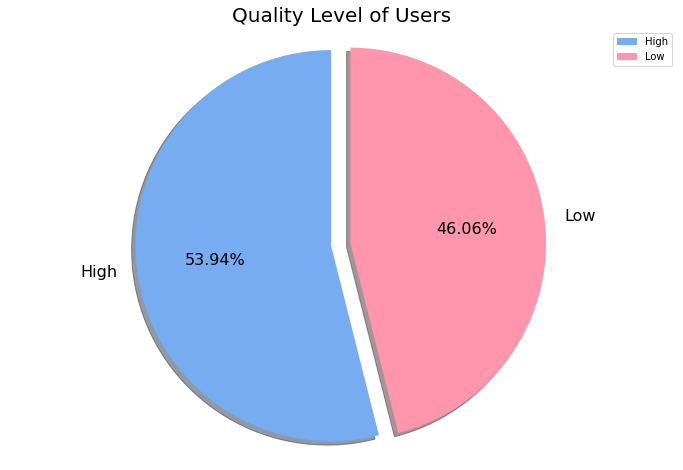

In [27]:
plt.figure(figsize=(12,8))
my_labels = 'High','Low'
my_colors = ['#77ACF1','#FF96AD']
my_explode = (0, 0.1)
plt.pie(df['quality_level'].value_counts(), labels=my_labels, autopct='%1.2f%%', startangle=90, shadow = True, colors=my_colors, explode=my_explode, textprops={'fontsize': 16})
plt.title('Quality Level of Users', fontsize=20)
plt.axis('equal')
plt.legend()
plt.show()

In [28]:
df[df['company_kyc_status_name'].isna() == True]

,company_id,quality_level,company_name,company_type_group,company_created_date,company_registered_date,company_age_days,company_kyc_status_name,have_subscription,sales_invoice_count,sales_receipt_count,sales_order_count,delivery_order_count,sales_invoice_normalized_rate,purchase_invoice_count,purchase_receipt_count,purchase_order_count,good_receipt_count,purchase_invoice_normalized_rate,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,reconciled_pi_rate,si_biggest_distribution,pi_biggest_distribution,sales_invoice_other_template_count,invoice_logo_count,scheduler_count,partner_invoice_count,si_send_rate,last_created_invoice_date,last_created_payment_date,last_created_order_date,last_created_partner_date,last_created_product_date,referral_used_count,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate
28,3e6173ea-120a-4f0e-8593-7a45073175a6,High,PT TENTSO KOLABORASI INDONESIA,pt,2022-11-07,2022-11-07,512,None,1,7.00,2.00,22.00,nan,1.40,0.00,0.00,3.00,nan,0.00,0.39,0.00,0.00,0.00,0.00,0.14,0.00,0.00,7.00,nan,7.00,0.00,2023-07-24,2022-11-30,2023-07-19,2023-07-24,2023-07-19,0.00,nan,nan,nan,nan
41,001d5b5f-fc30-43be-b2ae-de7675dec273,Low,Adete store,perorangan,2023-03-30,2023-03-30,369,None,1,2.00,2.00,nan,nan,2.00,0.00,0.00,nan,nan,0.00,1.00,0.00,0.50,0.00,0.00,1.00,0.00,0.00,2.00,nan,1.00,1.00,2023-03-30,2023-03-30,NaT,2023-03-30,2023-03-30,0.00,0.00,nan,1.00,0.00
106,078a9dc8-56b9-4cf0-8220-fb9910dea21f,Low,Ozone Laundry,perorangan,2023-02-28,2023-02-28,399,None,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2023-02-28,NaT,0.00,1.00,1.00,0.00,1.00
140,0017a1b2-ed30-4f76-9824-038e0b071aca,High,PT. CUBE TECH INDONESIA,pt,2021-09-28,2021-09-28,917,None,1,13.00,3.00,nan,nan,1.30,0.00,0.00,nan,nan,0.00,0.83,0.00,0.92,0.00,0.00,0.77,0.00,6.00,12.00,nan,4.00,0.08,2023-04-12,2022-08-30,NaT,2023-01-03,2023-04-12,0.00,0.00,nan,1.00,0.00
143,0021fa62-3e8a-4f95-ba0a-42728b8b73fb,High,Jiwalu Workshop,perorangan,2023-03-11,2023-03-11,388,None,1,3.00,3.00,nan,nan,1.50,0.00,0.00,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.67,0.00,0.00,3.00,nan,2.00,1.00,2023-05-26,2023-05-26,NaT,2023-05-26,2023-03-11,0.00,nan,nan,nan,nan
231,0342089b-11d2-4949-9b2e-938b8963814b,Low,Ayam Penyet,perorangan,2023-07-28,2023-09-11,204,None,1,5.00,5.00,nan,nan,2.50,0.00,0.00,nan,nan,0.00,0.00,nan,0.00,1.00,0.00,1.00,0.00,0.00,0.00,nan,1.00,1.00,2023-09-16,2023-09-16,NaT,2023-09-11,NaT,0.00,0.17,1.00,0.83,0.17
246,013051cb-3e8e-4b89-8809-f3ac6e59d54d,High,CV. DANAKIRTI GROUP,cv,2022-10-05,2022-10-05,545,None,1,79.00,74.00,nan,nan,1.49,78.00,54.00,nan,nan,2.11,0.00,nan,0.01,0.00,0.00,0.10,0.09,79.00,159.00,nan,44.00,0.01,2023-07-19,2023-06-01,NaT,2023-07-13,NaT,0.00,nan,nan,nan,nan
253,01c07ca0-8d21-11e9-9b77-ed40c2b9abb6,High,Allegro Interior,perorangan,2019-06-12,2019-06-12,1756,None,1,85.00,123.00,86.00,0.00,1.29,2.00,2.00,2.00,0.00,1.00,0.15,0.74,0.55,0.00,0.00,0.15,1.00,85.00,85.00,nan,52.00,0.00,2023-06-14,2023-06-14,2023-06-14,2023-05-15,2021-07-28,1.00,nan,nan,nan,nan
262,01afe568-13c7-4b49-a0a3-a1a213cde191,High,Java Tech-ID,perorangan,2022-06-11,2022-06-11,661,None,1,37.00,11.00,nan,0.00,1.12,0.00,0.00,nan,0.00,0.00,0.99,0.02,0.51,0.00,0.00,0.14,0.00,37.00,37.00,nan,25.00,0.00,2023-06-29,2023-05-07,NaT,2023-06-29,2023-06-29,0.00,nan,nan,nan,nan
268,951e7d78-c3f1-47a5-9330-3ee363196c62,High,EVENT PACKAGE BY OCULUSPHOTO STUDIO,perorangan,2023-05-16,2023-05-16,322,None,1,131.00,142.00,nan,nan,21.83,0.00,0.00,nan,nan,0.00,1.00,0.00,0.05,0.00,0.00,0.02,0.00,0.00,0.00,nan,126.00,0.55,2023-06-25,2023-06-25,NaT,2023-06-25,2023-05-28,0.00,nan,nan,nan,nan


In [29]:
# Finding Null Data
print(df.isnull().sum())

company_id                              0
quality_level                           0
company_name                            0
company_type_group                      0
company_created_date                    0
company_registered_date                 0
company_age_days                        0
company_kyc_status_name                12
have_subscription                       0
sales_invoice_count                    34
sales_receipt_count                    44
sales_order_count                     239
delivery_order_count                  266
sales_invoice_normalized_rate          34
purchase_invoice_count                 34
purchase_receipt_count                 44
purchase_order_count                  239
good_receipt_count                    266
purchase_invoice_normalized_rate       34
saved_invoice_item_rate                34
tracked_stock_product_rate            152
top_sales_invoice_rate                 34
reconciled_si_rate                     42
reconciled_pi_rate                

In [30]:
# Filling Missing Values
## Method 1 : kyc status name with belum_validasi and others with 0

df['company_kyc_status_name'].fillna('belum_validasi', inplace=True)
cols = ['sales_invoice_count',
       'sales_receipt_count', 'sales_order_count', 'delivery_order_count',
       'purchase_invoice_count', 'purchase_receipt_count',
       'purchase_order_count', 'good_receipt_count', 'saved_invoice_item_rate',
       'tracked_stock_product_rate', 'top_sales_invoice_rate',
       'reconciled_si_rate', 'reconciled_pi_rate', 'si_biggest_distribution',
       'pi_biggest_distribution', 'sales_invoice_other_template_count',
       'invoice_logo_count', 'scheduler_count', 'partner_invoice_count',
       'si_send_rate','referral_used_count', 'pyor_digpay_rate', 'pyor_payout_rate',
       'payin_digpay_rate', 'payout_digpay_rate','sales_invoice_normalized_rate','purchase_invoice_normalized_rate']
for i in cols :
    df[i].fillna(0, inplace=True)

date_cols = ['company_created_date', 'company_registered_date', 'last_created_invoice_date',
       'last_created_payment_date', 'last_created_order_date',
       'last_created_partner_date', 'last_created_product_date']
df.drop(date_cols, inplace=True, axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 342
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_id                          343 non-null    object 
 1   quality_level                       343 non-null    object 
 2   company_name                        343 non-null    object 
 3   company_type_group                  343 non-null    object 
 4   company_age_days                    343 non-null    int64  
 5   company_kyc_status_name             343 non-null    object 
 6   have_subscription                   343 non-null    int64  
 7   sales_invoice_count                 343 non-null    float64
 8   sales_receipt_count                 343 non-null    float64
 9   sales_order_count                   343 non-null    float64
 10  delivery_order_count                343 non-null    float64
 11  sales_invoice_normalized_rate       343 non-n

In [33]:
df.columns

Index(['company_id', 'quality_level', 'company_name', 'company_type_group',
       'company_age_days', 'company_kyc_status_name', 'have_subscription',
       'sales_invoice_count', 'sales_receipt_count', 'sales_order_count',
       'delivery_order_count', 'sales_invoice_normalized_rate',
       'purchase_invoice_count', 'purchase_receipt_count',
       'purchase_order_count', 'good_receipt_count',
       'purchase_invoice_normalized_rate', 'saved_invoice_item_rate',
       'tracked_stock_product_rate', 'top_sales_invoice_rate',
       'reconciled_si_rate', 'reconciled_pi_rate', 'si_biggest_distribution',
       'pi_biggest_distribution', 'sales_invoice_other_template_count',
       'invoice_logo_count', 'scheduler_count', 'partner_invoice_count',
       'si_send_rate', 'referral_used_count', 'pyor_digpay_rate',
       'pyor_payout_rate', 'payin_digpay_rate', 'payout_digpay_rate'],
      dtype='object')

In [34]:
df['company_kyc_status_name'] = LabelEncoder().fit_transform(df['company_kyc_status_name'].values)

In [35]:
df['company_type_group'] = LabelEncoder().fit_transform(df['company_type_group'].values)

In [36]:
df['quality_level'] = LabelEncoder().fit_transform(df['quality_level'].values)

In [37]:
df_raw = df.copy()
raw = df.copy()

In [38]:
x = df.drop(['company_id', 'quality_level','company_name'], axis=1)
y = df['quality_level']

In [39]:
print(x.isna().sum())
print(y.isna().sum())
print(x.shape)
print(y.shape)

company_type_group                    0
company_age_days                      0
company_kyc_status_name               0
have_subscription                     0
sales_invoice_count                   0
sales_receipt_count                   0
sales_order_count                     0
delivery_order_count                  0
sales_invoice_normalized_rate         0
purchase_invoice_count                0
purchase_receipt_count                0
purchase_order_count                  0
good_receipt_count                    0
purchase_invoice_normalized_rate      0
saved_invoice_item_rate               0
tracked_stock_product_rate            0
top_sales_invoice_rate                0
reconciled_si_rate                    0
reconciled_pi_rate                    0
si_biggest_distribution               0
pi_biggest_distribution               0
sales_invoice_other_template_count    0
invoice_logo_count                    0
scheduler_count                       0
partner_invoice_count                 0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 31), (69, 31), (274,), (69,))

## Feature Selection

In [111]:
x1 = x.drop(['company_kyc_status_name','have_subscription','delivery_order_count','good_receipt_count','reconciled_pi_rate','scheduler_count','referral_used_count'], axis=1)
y1 = y

In [112]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((274, 24), (69, 24), (274,), (69,))

In [113]:
x1

,company_type_group,company_age_days,sales_invoice_count,sales_receipt_count,sales_order_count,sales_invoice_normalized_rate,purchase_invoice_count,purchase_receipt_count,purchase_order_count,purchase_invoice_normalized_rate,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,si_biggest_distribution,pi_biggest_distribution,sales_invoice_other_template_count,invoice_logo_count,partner_invoice_count,si_send_rate,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate
0,2,76,245.00,240.00,0.00,6.45,1.00,0.00,0.00,1.00,0.00,0.00,0.01,0.98,0.08,1.00,0.00,0.00,86.00,1.00,0.05,1.00,0.95,0.05
1,2,91,1.00,1.00,0.00,1.00,127.00,128.00,0.00,2.31,0.00,0.00,0.00,1.00,1.00,0.14,0.00,0.00,48.00,1.00,0.00,0.00,0.01,0.99
2,2,820,11286.00,13012.00,1.00,26.25,0.00,0.00,0.00,0.00,1.00,0.00,0.11,0.03,0.00,0.00,0.00,9072.00,10719.00,0.01,0.00,0.00,0.00,0.00
3,2,820,11286.00,13012.00,1.00,26.25,0.00,0.00,0.00,0.00,1.00,0.00,0.11,0.03,0.00,0.00,0.00,9072.00,10719.00,0.01,0.00,0.00,0.00,0.00
4,2,341,7901.00,8670.00,0.00,41.80,1.00,1.00,0.00,1.00,0.24,0.00,0.25,0.36,0.00,1.00,0.00,7901.00,6268.00,1.00,0.00,0.67,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2,310,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00
339,2,328,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,1.00,0.94,1.00,0.06,0.94
340,3,90,30.00,26.00,0.00,1.36,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.80,0.10,0.00,0.00,31.00,22.00,0.03,0.00,0.00,0.00,0.00
341,2,1650,1089.00,1076.00,1065.00,7.03,127.00,123.00,116.00,2.05,0.64,1.00,0.01,0.15,0.06,0.62,0.00,1222.00,738.00,0.00,0.00,0.00,0.00,0.00


## Logistic Regression

In [114]:
model_lr = LogisticRegression()
model_lr.fit(X1_train, y1_train)
y1_train_pred_lr = model_lr.predict(X1_train)
y1_pred_lr = model_lr.predict(X1_test)
conf_matrix_train_lr = confusion_matrix (y1_train, y1_train_pred_lr)
conf_matrix_lr = confusion_matrix(y1_test, y1_pred_lr)

/home/yogi/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [115]:
file_path = 'model_lr_v2.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(model_lr, f)

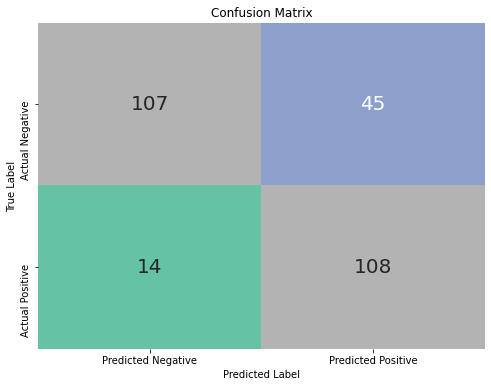

In [116]:
# Plotting confusion matrix train
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_lr, annot=True, cmap='Set2', fmt='g', cbar=False, annot_kws={"fontsize": 20})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0.5, 1.5], ['Actual Negative', 'Actual Positive'])
plt.show()

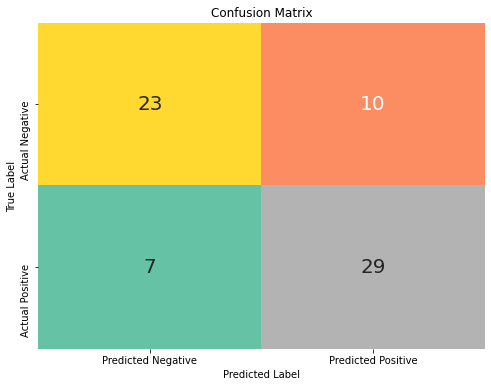

In [117]:
# Plotting confusion matrix test
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Set2', fmt='g', cbar=False, annot_kws={"fontsize": 20})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0.5, 1.5], ['Actual Negative', 'Actual Positive'])
plt.show()

In [118]:
roc_auc_score(y1_train, y1_train_pred_lr)

0.7945966350301985

In [119]:
roc_auc_score(y1_test, y1_pred_lr)

0.7512626262626263

In [120]:
# Obtain predicted probabilities for the positive class
y1_pred_prob = model_lr.predict_proba(X1_test)[:, 1]

# Calculate KS statistic using SciPy's ks_2samp
ks_statistic, p_value = ks_2samp(y1_test, y1_pred_prob)

# Print KS statistic and p-value
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

KS Statistic: 0.5217391304347826
P-value: 6.2369639915234526e-09


## [Draft] Data Processing

In [131]:
print(x1.dtypes)
print(x1.shape)

company_type_group                      int64
company_age_days                        int64
sales_invoice_count                   float64
sales_receipt_count                   float64
sales_order_count                     float64
sales_invoice_normalized_rate         float64
purchase_invoice_count                float64
purchase_receipt_count                float64
purchase_order_count                  float64
purchase_invoice_normalized_rate      float64
saved_invoice_item_rate               float64
tracked_stock_product_rate            float64
top_sales_invoice_rate                float64
reconciled_si_rate                    float64
si_biggest_distribution               float64
pi_biggest_distribution               float64
sales_invoice_other_template_count    float64
invoice_logo_count                    float64
partner_invoice_count                 float64
si_send_rate                          float64
pyor_digpay_rate                      float64
pyor_payout_rate                  

In [132]:
"""
purchase order--> dibuat biner 1: ada, 0: gada (kak quinss) --> purchase_order_count
company_age: dikategori jadi 10 (kak  quinss) --> company_age_days
"""

'\npurchase order--> dibuat biner 1: ada, 0: gada (kak quinss) --> purchase_order_count\ncompany_age: dikategori jadi 10 (kak  quinss) --> company_age_days\n'

In [133]:
sc = MinMaxScaler((0, 1))
x1['company_age_days_scaled'] = sc.fit_transform(x1['company_age_days'].values.reshape(-1, 1))

x1['company_age_days_category'] = pd.cut(x=x1['company_age_days_scaled'], bins=4, labels=['0','1','2','3'])
x1['company_age_days_interval'] = pd.cut(x=x1['company_age_days'], bins = 4)

In [134]:
x1[['company_age_days_scaled','company_age_days_category','company_age_days_interval']]

,company_age_days_scaled,company_age_days_category,company_age_days_interval
0,0.01,0,"(39.617, 637.75]"
1,0.02,0,"(39.617, 637.75]"
2,0.33,1,"(637.75, 1233.5]"
3,0.33,1,"(637.75, 1233.5]"
4,0.13,0,"(39.617, 637.75]"
...,...,...,...
338,0.11,0,"(39.617, 637.75]"
339,0.12,0,"(39.617, 637.75]"
340,0.02,0,"(39.617, 637.75]"
341,0.67,2,"(1233.5, 1829.25]"


## Calculating New Columns

In [226]:
df_raw = raw.copy()

In [227]:
print(df_raw.columns)
print(df_raw.shape)
print(df_raw.info())

Index(['company_id', 'quality_level', 'company_name', 'company_type_group',
       'company_age_days', 'company_kyc_status_name', 'have_subscription',
       'sales_invoice_count', 'sales_receipt_count', 'sales_order_count',
       'delivery_order_count', 'sales_invoice_normalized_rate',
       'purchase_invoice_count', 'purchase_receipt_count',
       'purchase_order_count', 'good_receipt_count',
       'purchase_invoice_normalized_rate', 'saved_invoice_item_rate',
       'tracked_stock_product_rate', 'top_sales_invoice_rate',
       'reconciled_si_rate', 'reconciled_pi_rate', 'si_biggest_distribution',
       'pi_biggest_distribution', 'sales_invoice_other_template_count',
       'invoice_logo_count', 'scheduler_count', 'partner_invoice_count',
       'si_send_rate', 'referral_used_count', 'pyor_digpay_rate',
       'pyor_payout_rate', 'payin_digpay_rate', 'payout_digpay_rate'],
      dtype='object')
(343, 34)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 342
Da

In [228]:
df_raw['invoice_logo_rate']=(df_raw['invoice_logo_count'])/(df_raw['sales_invoice_count']+df_raw['purchase_invoice_count'])

In [229]:
df_raw['sales_invoice_other_template_rate']=(df_raw['sales_invoice_other_template_count'])/(df_raw['sales_invoice_count'])

In [230]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 342
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_id                          343 non-null    object 
 1   quality_level                       343 non-null    int64  
 2   company_name                        343 non-null    object 
 3   company_type_group                  343 non-null    int64  
 4   company_age_days                    343 non-null    int64  
 5   company_kyc_status_name             343 non-null    int64  
 6   have_subscription                   343 non-null    int64  
 7   sales_invoice_count                 343 non-null    float64
 8   sales_receipt_count                 343 non-null    float64
 9   sales_order_count                   343 non-null    float64
 10  delivery_order_count                343 non-null    float64
 11  sales_invoice_normalized_rate       343 non-n

In [247]:
def ar_usage (df_raw):
    score = 0
    if df_raw['sales_invoice_count'] >= 5:
        score += 18
    if df_raw['sales_receipt_count'] >= 2:
        score += 7
    if df_raw['sales_order_count'] >= 1:
        score += 40
    if df_raw['sales_invoice_normalized_rate'] >= 1.25:
        score += 35
    return min(score, 100)

In [248]:
def ap_usage (df_raw):
    score = 0
    if df_raw['purchase_invoice_count'] >= 3:
        score += 18
    if df_raw['purchase_receipt_count'] >= 1:
        score += 7
    if df_raw['purchase_order_count'] >= 1:
        score += 40
    if df_raw['purchase_invoice_normalized_rate'] > 1:
        score += 35
    return min(score, 100)

In [249]:
df_raw['ar_usage'] = df_raw.apply(ar_usage, axis=1)

In [250]:
df_raw['ap_usage'] = df_raw.apply(ap_usage, axis=1)

In [243]:
sc = MinMaxScaler((0, 1))
df_raw['company_age_days_scaled'] = sc.fit_transform(df_raw['company_age_days'].values.reshape(-1, 1))

df_raw['company_age_days_category'] = pd.cut(x=df_raw['company_age_days_scaled'], bins=4, labels=['0','1','2','3'])
df_raw['company_age_days_interval'] = pd.cut(x=df_raw['company_age_days'], bins = 4)

In [244]:
df_raw.describe(datetime_is_numeric=True, include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company_id,343,329,0088e83d-4553-4049-b260-f028d292f858,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality_level,343.00,NaN,NaN,NaN,0.46,0.50,0.00,0.00,0.00,1.00,1.00
company_name,343,329,Juntak Tour & Travel,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_type_group,343.00,NaN,NaN,NaN,2.03,0.69,0.00,2.00,2.00,2.00,3.00
company_age_days,343.00,NaN,NaN,NaN,557.32,492.05,42.00,215.00,379.00,797.00,2425.00
company_kyc_status_name,343.00,NaN,NaN,NaN,3.80,1.83,0.00,1.00,5.00,5.00,5.00
have_subscription,343.00,NaN,NaN,NaN,0.99,0.09,0.00,1.00,1.00,1.00,1.00
sales_invoice_count,343.00,NaN,NaN,NaN,673.62,2330.42,0.00,1.00,17.00,155.00,25151.00
sales_receipt_count,343.00,NaN,NaN,NaN,637.12,2348.78,0.00,0.00,11.00,113.00,25954.00
sales_order_count,343.00,NaN,NaN,NaN,81.29,526.59,0.00,0.00,0.00,0.00,5814.00


In [238]:
df_raw[df_raw['quality_level'] == 1].describe(datetime_is_numeric=True, include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company_id,158,157,04fa501d-cbb3-4ed2-9118-5bae52c18287,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality_level,158.00,NaN,NaN,NaN,1.00,0.00,1.00,1.00,1.00,1.00,1.00
company_name,158,157,SEMISHOP,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_type_group,158.00,NaN,NaN,NaN,2.02,0.54,0.00,2.00,2.00,2.00,3.00
company_age_days,158.00,NaN,NaN,NaN,417.04,352.97,42.00,182.50,325.50,468.50,1952.00
company_kyc_status_name,158.00,NaN,NaN,NaN,4.07,1.72,0.00,5.00,5.00,5.00,5.00
have_subscription,158.00,NaN,NaN,NaN,0.99,0.08,0.00,1.00,1.00,1.00,1.00
sales_invoice_count,158.00,NaN,NaN,NaN,79.66,494.21,0.00,0.00,1.00,8.00,5764.00
sales_receipt_count,158.00,NaN,NaN,NaN,38.39,187.98,0.00,0.00,0.00,5.00,2038.00
sales_order_count,158.00,NaN,NaN,NaN,3.53,43.03,0.00,0.00,0.00,0.00,541.00


In [206]:
df_raw['company_age_days_interval'].value_counts()

(39.617, 637.75]     239
(637.75, 1233.5]      63
(1233.5, 1829.25]     29
(1829.25, 2425.0]     12
Name: company_age_days_interval, dtype: int64

In [207]:
df_raw['company_age_days_category'].value_counts()

0    239
1     63
2     29
3     12
Name: company_age_days_category, dtype: int64

In [208]:
df_raw.drop(['invoice_logo_count', 'sales_invoice_count', 'purchase_invoice_count', 'sales_invoice_other_template_count',
        'purchase_receipt_count', 'sales_receipt_count', 'sales_order_count', 'purchase_order_count', 
         'delivery_order_count'], inplace = True, axis = 1)

In [209]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 342
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   company_id                         343 non-null    object  
 1   quality_level                      343 non-null    int64   
 2   company_name                       343 non-null    object  
 3   company_type_group                 343 non-null    int64   
 4   company_age_days                   343 non-null    int64   
 5   company_kyc_status_name            343 non-null    int64   
 6   have_subscription                  343 non-null    int64   
 7   sales_invoice_normalized_rate      343 non-null    float64 
 8   good_receipt_count                 343 non-null    float64 
 9   purchase_invoice_normalized_rate   343 non-null    float64 
 10  saved_invoice_item_rate            343 non-null    float64 
 11  tracked_stock_product_rate         343 non-nu

In [210]:
df_raw.head(15)

,company_id,quality_level,company_name,company_type_group,company_age_days,company_kyc_status_name,have_subscription,sales_invoice_normalized_rate,good_receipt_count,purchase_invoice_normalized_rate,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,reconciled_pi_rate,si_biggest_distribution,pi_biggest_distribution,scheduler_count,partner_invoice_count,si_send_rate,referral_used_count,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate,invoice_logo_rate,sales_invoice_other_template_rate,ar_usage,ap_usage,company_age_days_scaled,company_age_days_category,company_age_days_interval
0,4b2e3b4b-70d7-4db3-8fd6-c8160bbdc9aa,0,Lien Sacre,2,76,0,1,6.45,0.00,1.00,0.00,0.00,0.01,0.98,0.00,0.08,1.00,0.00,86.00,1.00,0.00,0.05,1.00,0.95,0.05,0.00,0.00,82,0,0.01,0,"(39.617, 637.75]"
1,dd33dd3b-6516-48f7-9fd3-3fa15f353e28,0,PD Jaya Motor,2,91,5,1,1.00,0.00,2.31,0.00,0.00,0.00,1.00,0.00,1.00,0.14,0.00,48.00,1.00,0.00,0.00,0.00,0.01,0.99,0.00,0.00,0,82,0.02,0,"(39.617, 637.75]"
2,6c0a46aa-0ee2-4c1f-a5c5-5cdd3910f3a7,0,OCULUSPHOTO STUDIO GALUHMAS,2,820,1,1,26.25,0.00,0.00,1.00,0.00,0.11,0.03,0.00,0.00,0.00,0.00,10719.00,0.01,0.00,0.00,0.00,0.00,0.00,0.80,0.00,100,0,0.33,1,"(637.75, 1233.5]"
3,6c0a46aa-0ee2-4c1f-a5c5-5cdd3910f3a7,0,OCULUSPHOTO STUDIO GALUHMAS,2,820,1,1,26.25,0.00,0.00,1.00,0.00,0.11,0.03,0.00,0.00,0.00,0.00,10719.00,0.01,0.00,0.00,0.00,0.00,0.00,0.80,0.00,100,0,0.33,1,"(637.75, 1233.5]"
4,7faf9b15-5df3-4e04-b3b5-da46236198bf,0,Beverly Florist,2,341,5,1,41.80,0.00,1.00,0.24,0.00,0.25,0.36,0.00,0.00,1.00,0.00,6268.00,1.00,0.00,0.00,0.67,1.00,0.00,1.00,0.00,82,35,0.13,0,"(39.617, 637.75]"
5,c1271a80-4c54-11e9-bc6a-4f4995e8c05d,0,Links CCTV,2,1838,5,1,1.28,0.00,1.68,0.80,0.96,0.37,0.04,0.00,0.03,0.81,0.00,137.00,0.03,0.00,0.50,1.00,0.50,0.50,0.98,1.00,100,82,0.75,3,"(1829.25, 2425.0]"
6,505141c5-36ba-4bfe-ac83-bd69ffd2ce3e,0,Deli Catering,2,2425,5,0,8.62,0.00,4.52,0.86,0.00,0.38,0.17,0.00,0.03,0.20,0.00,751.00,0.60,2.00,0.00,0.00,1.00,0.00,0.52,0.00,100,82,1.00,3,"(1829.25, 2425.0]"
7,8fdb3890-e6bb-4747-a7c6-19b6f3acb538,0,Graha Properti2,2,1547,5,1,16.35,0.00,0.00,1.00,0.00,0.01,0.50,0.00,0.05,0.00,0.00,1374.00,0.66,0.00,0.00,0.00,1.00,0.00,0.95,1.00,82,0,0.63,2,"(1233.5, 1829.25]"
8,6e7ff7a4-df51-4ffa-8015-b07c13d8b05e,0,BITNet,2,802,5,1,15.35,0.00,1.00,0.99,0.00,1.00,0.56,0.00,0.02,1.00,12.00,114.00,0.94,0.00,0.01,1.00,0.99,0.01,0.98,0.00,82,35,0.32,1,"(637.75, 1233.5]"
9,2d661b8f-1761-4cd9-9f1c-1d955ce2f1da,0,Infusion Coconut Water,2,85,5,1,3.15,0.00,1.90,0.91,0.47,0.53,0.98,0.00,0.06,0.24,0.00,150.00,0.99,0.00,0.00,0.00,0.78,0.22,1.06,0.73,82,82,0.02,0,"(39.617, 637.75]"


In [211]:
print(df_raw.columns)
print(df_raw.shape)
print(df_raw.info())

Index(['company_id', 'quality_level', 'company_name', 'company_type_group',
       'company_age_days', 'company_kyc_status_name', 'have_subscription',
       'sales_invoice_normalized_rate', 'good_receipt_count',
       'purchase_invoice_normalized_rate', 'saved_invoice_item_rate',
       'tracked_stock_product_rate', 'top_sales_invoice_rate',
       'reconciled_si_rate', 'reconciled_pi_rate', 'si_biggest_distribution',
       'pi_biggest_distribution', 'scheduler_count', 'partner_invoice_count',
       'si_send_rate', 'referral_used_count', 'pyor_digpay_rate',
       'pyor_payout_rate', 'payin_digpay_rate', 'payout_digpay_rate',
       'invoice_logo_rate', 'sales_invoice_other_template_rate', 'ar_usage',
       'ap_usage', 'company_age_days_scaled', 'company_age_days_category',
       'company_age_days_interval'],
      dtype='object')
(343, 32)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 342
Data columns (total 32 columns):
 #   Column                         

In [251]:
df1 = df_raw.copy()
df1 = df1[['quality_level', 'company_type_group', 'saved_invoice_item_rate',
       'tracked_stock_product_rate', 'top_sales_invoice_rate',
       'reconciled_si_rate', 'si_biggest_distribution',
       'pi_biggest_distribution', 'partner_invoice_count', 'si_send_rate',
       'pyor_digpay_rate', 'pyor_payout_rate', 'payin_digpay_rate',
       'payout_digpay_rate', 'invoice_logo_rate',
       'sales_invoice_other_template_rate', 'ar_usage', 'ap_usage',
       'company_age_days_category','sales_invoice_normalized_rate','purchase_invoice_normalized_rate']]

## EDA with Violin Plot & Heatmap

In [220]:
df1.quality_level.value_counts()

0    185
1    158
Name: quality_level, dtype: int64

In [221]:
df1.describe()

,quality_level,company_type_group,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,si_biggest_distribution,pi_biggest_distribution,partner_invoice_count,si_send_rate,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate,invoice_logo_rate,sales_invoice_other_template_rate,ar_usage,ap_usage,sales_invoice_normalized_rate,purchase_invoice_normalized_rate
count,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,309.00,264.00,343.00,343.00,343.00,343.00
mean,0.46,2.03,0.32,0.14,0.25,0.33,0.34,0.37,260.18,0.47,0.33,0.42,0.35,0.43,0.53,0.22,53.48,40.47,2.62,1.39
std,0.50,0.69,0.41,0.32,0.34,0.36,0.37,0.40,1258.46,0.46,0.42,0.46,0.44,0.46,0.49,0.39,40.69,40.30,5.16,4.41
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,0.00,0.00,0.00,0.00,0.01,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,0.00,2.00,0.00,0.00,0.03,0.17,0.18,0.21,6.00,0.26,0.00,0.06,0.04,0.14,0.80,0.00,75.00,35.00,1.25,1.00
75%,1.00,2.00,0.79,0.00,0.47,0.64,0.63,0.77,44.50,1.00,0.85,1.00,0.96,0.97,1.00,0.17,82.00,82.00,2.24,1.50
max,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,11896.00,1.00,1.00,1.00,1.00,1.00,1.28,1.00,100.00,100.00,45.44,65.60


In [222]:
def plot_violin_chart(df1, x, y):
    
    # Create violin chart
    fig = px.violin(df1, x=x, y=y, color='quality_level', box = True, violinmode= 'group',
                    title=f"Distribution of <b>{x}</b> by <b>{y}</b> with Violin Chart", 
                    labels={x: f"<b>{x}</b>", y: f"<b>{y}</b>"})

    # Show the figure
    fig.show()

In [252]:
for col in df1.columns :
    plot_violin_chart(df1, 'quality_level', col)

In [217]:
iv_columns = df1.copy()

In [253]:
iv_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 342
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   quality_level                      343 non-null    int64   
 1   company_type_group                 343 non-null    int64   
 2   saved_invoice_item_rate            343 non-null    float64 
 3   tracked_stock_product_rate         343 non-null    float64 
 4   top_sales_invoice_rate             343 non-null    float64 
 5   reconciled_si_rate                 343 non-null    float64 
 6   si_biggest_distribution            343 non-null    float64 
 7   pi_biggest_distribution            343 non-null    float64 
 8   partner_invoice_count              343 non-null    float64 
 9   si_send_rate                       343 non-null    float64 
 10  pyor_digpay_rate                   343 non-null    float64 
 11  pyor_payout_rate                   343 non-nu

In [254]:
iv_columns.columns

Index(['quality_level', 'company_type_group', 'saved_invoice_item_rate',
       'tracked_stock_product_rate', 'top_sales_invoice_rate',
       'reconciled_si_rate', 'si_biggest_distribution',
       'pi_biggest_distribution', 'partner_invoice_count', 'si_send_rate',
       'pyor_digpay_rate', 'pyor_payout_rate', 'payin_digpay_rate',
       'payout_digpay_rate', 'invoice_logo_rate',
       'sales_invoice_other_template_rate', 'ar_usage', 'ap_usage',
       'company_age_days_category'],
      dtype='object')

In [255]:
iv_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 342
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   quality_level                      343 non-null    int64   
 1   company_type_group                 343 non-null    int64   
 2   saved_invoice_item_rate            343 non-null    float64 
 3   tracked_stock_product_rate         343 non-null    float64 
 4   top_sales_invoice_rate             343 non-null    float64 
 5   reconciled_si_rate                 343 non-null    float64 
 6   si_biggest_distribution            343 non-null    float64 
 7   pi_biggest_distribution            343 non-null    float64 
 8   partner_invoice_count              343 non-null    float64 
 9   si_send_rate                       343 non-null    float64 
 10  pyor_digpay_rate                   343 non-null    float64 
 11  pyor_payout_rate                   343 non-nu

In [256]:
iv_columns['company_type_group'].value_counts()

2    256
3     61
0     25
1      1
Name: company_type_group, dtype: int64

In [257]:
iv_columns['company_type_group'] = LabelEncoder().fit_transform(iv_columns['company_type_group'].values)

In [258]:
iv_columns['quality_level'].value_counts()

0    185
1    158
Name: quality_level, dtype: int64

In [259]:
iv_columns['quality_level'] = LabelEncoder().fit_transform(iv_columns['quality_level'].values)

In [260]:
iv_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 342
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   quality_level                      343 non-null    int64   
 1   company_type_group                 343 non-null    int64   
 2   saved_invoice_item_rate            343 non-null    float64 
 3   tracked_stock_product_rate         343 non-null    float64 
 4   top_sales_invoice_rate             343 non-null    float64 
 5   reconciled_si_rate                 343 non-null    float64 
 6   si_biggest_distribution            343 non-null    float64 
 7   pi_biggest_distribution            343 non-null    float64 
 8   partner_invoice_count              343 non-null    float64 
 9   si_send_rate                       343 non-null    float64 
 10  pyor_digpay_rate                   343 non-null    float64 
 11  pyor_payout_rate                   343 non-nu

<AxesSubplot:>

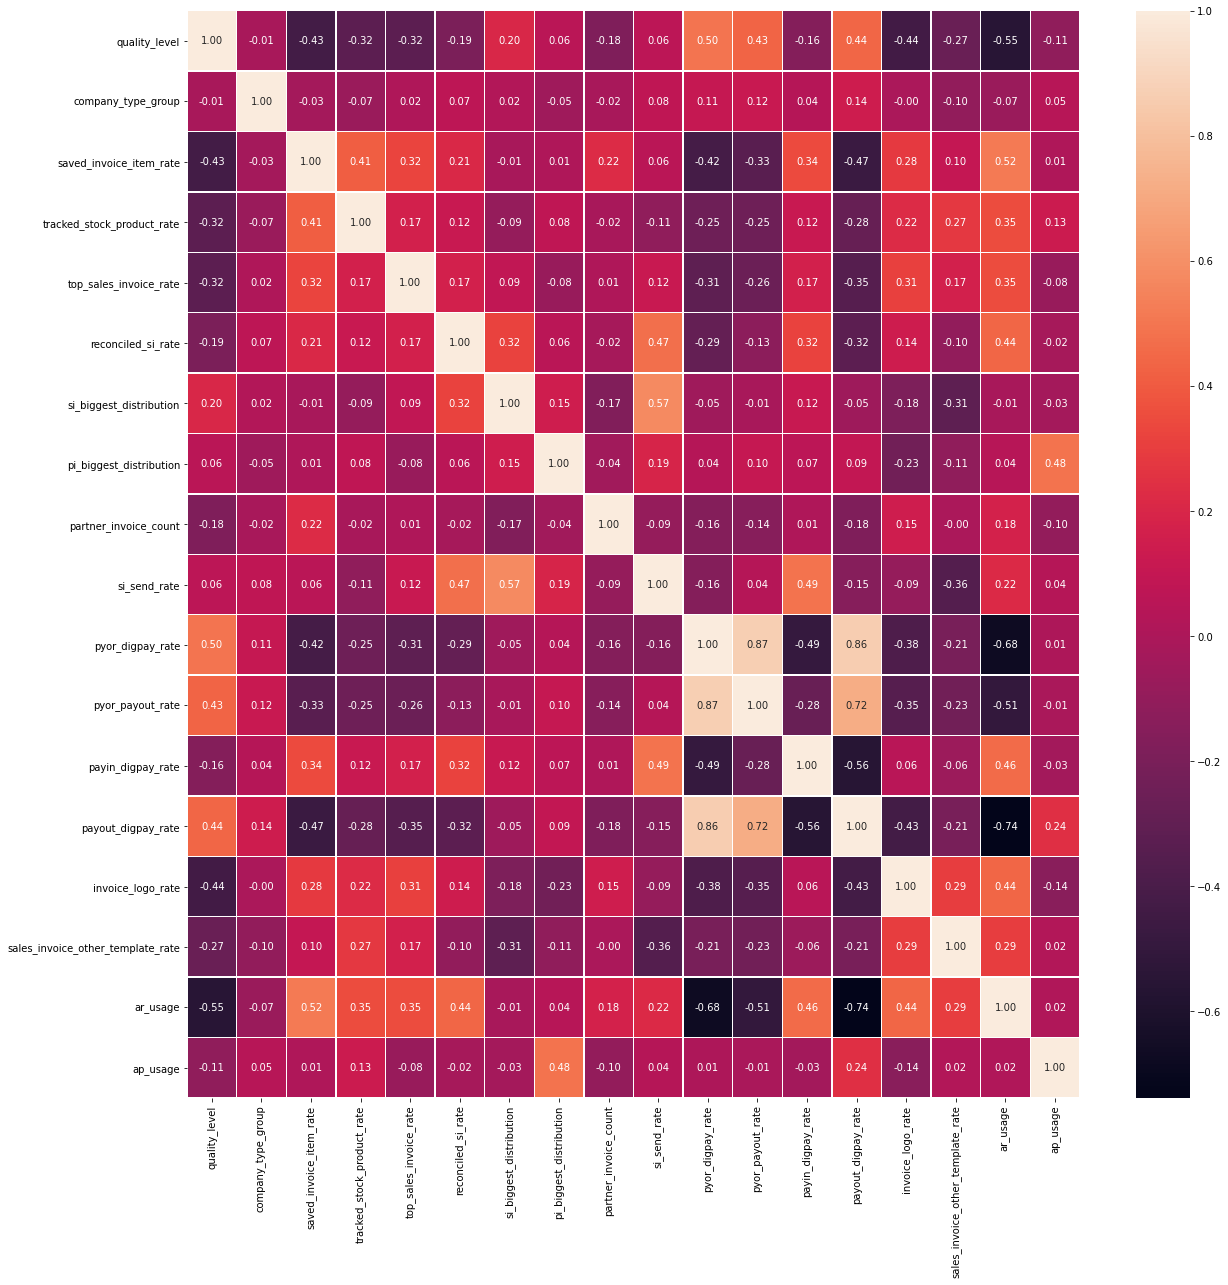

In [261]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(iv_columns.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

# Features Selection Using Hypothesis Testing Cannot be View

## Data Splitting

In [294]:
df1['invoice_logo_rate'].fillna(0, inplace=True)
df1['sales_invoice_other_template_rate'].fillna(0, inplace=True)

In [297]:
x1_new = df1.drop(['quality_level','sales_invoice_normalized_rate','purchase_invoice_normalized_rate'], axis = 1)
y1_new = df1['quality_level']

In [298]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1_new, y1_new, test_size=0.2, random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((274, 18), (69, 18), (274,), (69,))

# Experimental Parameters

In [299]:
df1.columns

Index(['quality_level', 'company_type_group', 'saved_invoice_item_rate',
       'tracked_stock_product_rate', 'top_sales_invoice_rate',
       'reconciled_si_rate', 'si_biggest_distribution',
       'pi_biggest_distribution', 'partner_invoice_count', 'si_send_rate',
       'pyor_digpay_rate', 'pyor_payout_rate', 'payin_digpay_rate',
       'payout_digpay_rate', 'invoice_logo_rate',
       'sales_invoice_other_template_rate', 'ar_usage', 'ap_usage',
       'company_age_days_category', 'sales_invoice_normalized_rate',
       'purchase_invoice_normalized_rate'],
      dtype='object')

In [300]:
df1.describe()

,quality_level,company_type_group,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,si_biggest_distribution,pi_biggest_distribution,partner_invoice_count,si_send_rate,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate,invoice_logo_rate,sales_invoice_other_template_rate,ar_usage,ap_usage,sales_invoice_normalized_rate,purchase_invoice_normalized_rate
count,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00
mean,0.46,2.03,0.32,0.14,0.25,0.33,0.34,0.37,260.18,0.47,0.33,0.42,0.35,0.43,0.47,0.17,41.03,31.32,2.62,1.39
std,0.50,0.69,0.41,0.32,0.34,0.36,0.37,0.40,1258.46,0.46,0.42,0.46,0.44,0.46,0.49,0.36,35.30,34.91,5.16,4.41
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,0.00,0.00,0.00,0.00,0.01,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,0.00,2.00,0.00,0.00,0.03,0.17,0.18,0.21,6.00,0.26,0.00,0.06,0.04,0.14,0.00,0.00,42.00,7.00,1.25,1.00
75%,1.00,2.00,0.79,0.00,0.47,0.64,0.63,0.77,44.50,1.00,0.85,1.00,0.96,0.97,1.00,0.00,60.00,60.00,2.24,1.50
max,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,11896.00,1.00,1.00,1.00,1.00,1.00,1.28,1.00,100.00,100.00,45.44,65.60


In [301]:
df_raw.describe()

,quality_level,company_type_group,company_age_days,company_kyc_status_name,have_subscription,sales_invoice_count,sales_receipt_count,sales_order_count,delivery_order_count,sales_invoice_normalized_rate,purchase_invoice_count,purchase_receipt_count,purchase_order_count,good_receipt_count,purchase_invoice_normalized_rate,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,reconciled_pi_rate,si_biggest_distribution,pi_biggest_distribution,sales_invoice_other_template_count,invoice_logo_count,scheduler_count,partner_invoice_count,si_send_rate,referral_used_count,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate,invoice_logo_rate,sales_invoice_other_template_rate,ar_usage,ap_usage,company_age_days_scaled
count,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,309.00,264.00,343.00,343.00,343.00
mean,0.46,2.03,557.32,3.80,0.99,673.62,637.12,81.29,1.53,2.62,98.34,81.92,11.19,0.00,1.39,0.32,0.14,0.25,0.33,0.03,0.34,0.37,258.38,547.84,0.11,260.18,0.47,0.64,0.33,0.42,0.35,0.43,0.53,0.22,41.03,31.32,0.22
std,0.50,0.69,492.05,1.83,0.09,2330.42,2348.78,526.59,19.76,5.16,814.89,531.88,110.95,0.00,4.41,0.41,0.32,0.34,0.36,0.13,0.37,0.40,1594.54,2032.43,0.95,1258.46,0.46,6.27,0.42,0.46,0.44,0.46,0.49,0.39,35.30,34.91,0.21
min,0.00,0.00,42.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,215.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07
50%,0.00,2.00,379.00,5.00,1.00,17.00,11.00,0.00,0.00,1.25,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.03,0.17,0.00,0.18,0.21,0.00,1.00,0.00,6.00,0.26,0.00,0.00,0.06,0.04,0.14,0.80,0.00,42.00,7.00,0.14
75%,1.00,2.00,797.00,5.00,1.00,155.00,113.00,0.00,0.00,2.24,13.00,10.50,0.00,0.00,1.50,0.79,0.00,0.47,0.64,0.00,0.63,0.77,0.00,88.00,0.00,44.50,1.00,0.00,0.85,1.00,0.96,0.97,1.00,0.17,60.00,60.00,0.32
max,1.00,3.00,2425.00,5.00,1.00,25151.00,25954.00,5814.00,327.00,45.44,14300.00,8104.00,1804.00,0.00,65.60,1.00,1.00,1.00,1.00,1.00,1.00,1.00,25110.00,23862.00,12.00,11896.00,1.00,114.00,1.00,1.00,1.00,1.00,1.28,1.00,100.00,100.00,1.00


# Classification with Cross Validation

## With 18 Parameters

In [ ]:
logreg_model = LogisticRegression()

In [ ]:
param_grid = [    
    {'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_lr_new = GridSearchCV(logreg_model, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1, scoring='accuracy')
gridresults_lr_new = grid_search_lr_new.fit(X1_train, y1_train)

In [ ]:
print("Best: %f using %s" % (gridresults_lr_new .best_score_, gridresults_lr_new .best_params_))

In [ ]:
power_transformer = PowerTransformer(method='yeo-johnson')

# Definisikan pipeline
pipeline = Pipeline([
    ('power_transformer', power_transformer),  # Transformasi Yeo-Johnson
    ('logreg_model', logreg_model)  # Model Logistic Regression
])

# Parameter grid
param_grid = {    
    'logreg_model__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'logreg_model__C' : np.logspace(-4, 4, 20),
    'logreg_model__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'logreg_model__max_iter' : [100, 1000, 2500, 5000]
}

# Inisialisasi StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi GridSearchCV dengan pipeline
gridresults_lr_new2  = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, verbose=True, n_jobs=-1, scoring='accuracy')

# Melakukan pencarian grid
gridresults_lr_new2 = gridresults_lr_new2.fit(X1_train, y1_train)

In [ ]:
print("Best: %f using %s" % (gridresults_lr_new2.best_score_, gridresults_lr_new2.best_params_))

In [ ]:
model_lr_cv2 = gridresults_lr_new2.best_estimator_

In [ ]:
# training
y_pred_train_lr_cv2 = model_lr_cv2.predict(X1_train)
conf_matrix_lr_cv_train2 = confusion_matrix(y1_train, y_pred_train_lr_cv2)

#testing
y_pred_test_lr_cv2 = model_lr_cv2.predict(X1_test)
conf_matrix_lr_cv_test2 = confusion_matrix(y1_test, y_pred_test_lr_cv2)

In [ ]:
# Plotting confusion matrix train
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_cv_train2, annot=True, cmap='Set2', fmt='g', cbar=False, annot_kws={"fontsize": 20})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training')
plt.xticks([0.5, 1.5], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0.5, 1.5], ['Actual Negative', 'Actual Positive'])
plt.show()

In [ ]:
print(classification_report(y1_train, y_pred_train_lr_cv2))

In [ ]:
# Plotting confusion matrix test
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_cv_test2, annot=True, cmap='Set2', fmt='g', cbar=False, annot_kws={"fontsize": 20})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Testing')
plt.xticks([0.5, 1.5], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0.5, 1.5], ['Actual Negative', 'Actual Positive'])
plt.show()

In [ ]:
print(classification_report(y1_test, y_pred_test_lr_cv2))

In [ ]:
roc_lr_cv_train2 = roc_auc_score(y1_train, y_pred_train_lr_cv2)
roc_lr_cv_test2 = roc_auc_score(y1_test, y_pred_test_lr_cv2)

In [ ]:
roc_lr_cv_train2

In [ ]:
roc_lr_cv_test2

In [ ]:
# Calculate KS statistic using SciPy's ks_2samp
y1_prob_lr_cv_train2 = model_lr_cv1.predict_proba(X1_train)[:, 1]
y1_prob_lr_cv_test2 = model_lr_cv1.predict_proba(X1_test)[:, 1]

ks_statistic_lr_cv_train2, p_value_lr_cv_train2 = ks_2samp(y1_train, y1_prob_lr_cv_train2)
ks_statistic_lr_cv_test2, p_value_lr_cv_test2 = ks_2samp(y1_test, y1_prob_lr_cv_test2)

In [ ]:
ks_statistic_lr_cv_train2

In [ ]:
ks_statistic_lr_cv_test2

# Final Result Comparations

In [486]:
metrics_lr_train_cv = {
    'Model': 'Logistic Regression (Cross-Val 18)',
    'Data': 'Train',
    'Recall': recall_score(y1_train, y_pred_train_lr_cv2),
    'Precision': precision_score(y1_train, y_pred_train_lr_cv2),
    'F1 Score': f1_score(y1_train, y_pred_train_lr_cv2),
    'Accuracy': accuracy_score(y1_train, y_pred_train_lr_cv2),
    'KS stat' : ks_statistic_lr_cv_train2,
    'P-value' : '{:.2e}'.format(p_value_lr_cv_train2),
    'ROC-AUC' : roc_lr_cv_train2
    
}

metrics_lr_test_cv = {
    'Model': 'Logistic Regression (Cross-Val 18)',
    'Data': 'Test',
    'Recall': recall_score(y1_test, y_pred_test_lr_cv2),
    'Precision': precision_score(y1_test, y_pred_test_lr_cv2),
    'F1 Score': f1_score(y1_test, y_pred_test_lr_cv2),
    'Accuracy': accuracy_score(y1_test, y_pred_test_lr_cv2),
    'KS stat' : ks_statistic_lr_cv_test2,
    'P-value' : '{:.2e}'.format(p_value_lr_cv_test2),
    'ROC-AUC' : roc_lr_cv_test2
}

df_metrics = pd.DataFrame([metrics_lr_train_cv, metrics_lr_test_cv, metrics_lr_train_cv1, metrics_lr_test_cv1, metrics_lr_train_top5, metrics_lr_test_top5, metrics_lr_train_top7, metrics_lr_test_top7])

df_metrics = pd.DataFrame([metrics_lr_train_cv, metrics_lr_test_cv])
df_metrics.T

,0,1,2,3
Model,Logistic Regression (Cross-Val 18),Logistic Regression (Cross-Val 18),Logistic Regression (top 5),Logistic Regression (top 5)
Data,Train,Test,Train,Test
Recall,0.78,0.72,0.80,0.81
Precision,0.83,0.81,0.78,0.81
F1 Score,0.81,0.76,0.79,0.81
Accuracy,0.83,0.77,0.81,0.80
KS stat,0.55,0.52,0.55,0.52
P-value,4.02e-39,6.24e-09,4.02e-39,6.24e-09
ROC-AUC,0.83,0.77,0.81,0.80


In [408]:
# with open('model_lr_cv_top5_bc.pkl', 'wb') as f:
#     pickle.dump(model_lr_cv_top5, f)

with open('model_lr_cv_18prm_bc.pkl', 'wb') as f:
    pickle.dump(model_lr_cv2, f)
    
# with open('model_lr_cv_20prm_bc.pkl', 'wb') as f:
#     pickle.dump(model_lr_cv1, f)

# Quality Users Prediction

## collect data

In [81]:
query = """
SELECT
        *
FROM fact__smb__quality_users_temp
WHERE (last_created_invoice_date >= "2023-11-01" OR last_created_digpay_date >= "2023-11-01")
AND company_name IS NOT NULL AND company_name != "None"
"""

df_realtime = BQ.to_pull_data(query)
df_realtime.head()

Downloading: 100%|██████████| 51827/51827 [00:01<00:00, 49321.85rows/s]


,company_id,company_name,company_type_group,company_created_date,company_registered_date,company_age_days,company_kyc_status_name,have_subscription,sales_invoice_count,sales_receipt_count,sales_order_count,delivery_order_count,sales_invoice_normalized_rate,purchase_invoice_count,purchase_receipt_count,purchase_order_count,good_receipt_count,purchase_invoice_normalized_rate,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,reconciled_pi_rate,si_biggest_distribution,pi_biggest_distribution,sales_invoice_other_template_count,invoice_logo_count,scheduler_count,partner_invoice_count,si_send_rate,last_created_invoice_date,last_created_payment_date,last_created_order_date,last_created_partner_date,last_created_product_date,referral_used_count,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate,last_created_digpay_date
0,abea3bef-c5be-4116-aa54-00bcec16eeac,Rmoda Andalan Care,cv,2023-12-22,2023-12-22,130,validasi_berhasil,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-01-23,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-23 12:16:48
1,17c751e7-a9b1-44ec-9d73-2b61b3a9790d,Gading Mega Tirta,cv,2021-11-15,2021-11-15,897,validasi_berhasil,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-03-18,NaT,0.00,0.94,1.00,0.06,0.94,2024-04-23 09:12:03
2,9bfe4656-df5f-4a1d-8a45-2246935c8689,NISKALA HARMONI TRANS,cv,2024-01-22,2024-01-22,99,validasi_berhasil,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-01-22,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-22 20:13:21
3,4fbb1bd3-8782-41f7-8ea4-b5b50c45c5d1,MAJU JAYA,cv,2023-11-18,2023-11-18,164,belum_validasi,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2023-11-18,NaT,0.00,1.00,1.00,0.00,1.00,2023-11-22 09:21:01
4,7de7f10d-cd9a-4428-812c-54871acbf983,Dua Kawan Utama,cv,2024-01-18,2024-01-18,103,dokumen_kurang_lengkap,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-01-20,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-20 11:45:15


## Predicting

In [82]:
label_mapping_type_company = {
    'perorangan' : 2,
    'pt': 3,
    'cv': 0,
    'koperasi': 1,
    'firma' : 1,
    'lainnya' : 1
}

In [83]:
def ar_usage (df):
    score = 0
    if df['sales_invoice_count'] >= 5:
        score += 18
    if df['sales_receipt_count'] >= 2:
        score += 7
    if df['sales_order_count'] >= 1:
        score += 40
    if df['sales_invoice_normalized_rate'] >= 1.25:
        score += 35
    return min(score, 100)

In [84]:
def ap_usage (df):
    score = 0
    if df['purchase_invoice_count'] >= 3:
        score += 18
    if df['purchase_receipt_count'] >= 1:
        score += 7
    if df['purchase_order_count'] >= 1:
        score += 40
    if df['purchase_invoice_normalized_rate'] > 1:
        score += 35
    return min(score, 100)

In [85]:
def preprocessing (df):
    # parameters transformation
    sc = MinMaxScaler((0, 1))
    df['invoice_logo_rate']=(df['invoice_logo_count'])/(df['sales_invoice_count']+df['purchase_invoice_count'])
    df['sales_invoice_other_template_rate']=(df['sales_invoice_other_template_count'])/(df['sales_invoice_count'])
    df['company_age_days_scaled'] = sc.fit_transform(df['company_age_days'].values.reshape(-1, 1))
    df['company_age_days_category'] = pd.cut(x=df['company_age_days_scaled'], bins=4, labels=['0','1','2','3'])
    #df['company_age_days_category'] = df['company_age_days_category'].apply(pd.to_numeric, errors='coerce')
    #df['company_age_days_category'] = df['company_age_days_category'].fillna(0).astype(int)
    df['ar_usage'] = df.apply(ar_usage, axis=1)
    df['ap_usage'] = df.apply(ap_usage, axis=1)
    
    # encode
    df['company_type_group'] = df['company_type_group'].map(label_mapping_type_company)
    
    # filling missing values
    null_counts = df.isnull().sum()
    columns_null_val = null_counts[null_counts > 0].index.tolist()
    for i in columns_null_val :
        df[i].fillna(0, inplace=True)
        
   
    # data
    df = df[['ar_usage', 'partner_invoice_count', 'pyor_digpay_rate',
            'payout_digpay_rate', 'si_biggest_distribution',
            'reconciled_si_rate', 'invoice_logo_rate', 'pyor_payout_rate',
            'ap_usage', 'top_sales_invoice_rate', 'si_send_rate',
            'saved_invoice_item_rate', 'company_age_days_category',
            'company_type_group', 'pi_biggest_distribution',
            'tracked_stock_product_rate', 'payin_digpay_rate',
            'sales_invoice_other_template_rate']]
    
    return df

In [86]:
df = df_realtime.copy()

In [87]:
df_new = preprocessing(df)

In [88]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51827 entries, 0 to 51826
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   ar_usage                           51827 non-null  int64   
 1   partner_invoice_count              51827 non-null  float64 
 2   pyor_digpay_rate                   51827 non-null  float64 
 3   payout_digpay_rate                 51827 non-null  float64 
 4   si_biggest_distribution            51827 non-null  float64 
 5   reconciled_si_rate                 51827 non-null  float64 
 6   invoice_logo_rate                  51827 non-null  float64 
 7   pyor_payout_rate                   51827 non-null  float64 
 8   ap_usage                           51827 non-null  int64   
 9   top_sales_invoice_rate             51827 non-null  float64 
 10  si_send_rate                       51827 non-null  float64 
 11  saved_invoice_item_rate            51827 

In [89]:
df_realtime.head(15)

,company_id,company_name,company_type_group,company_created_date,company_registered_date,company_age_days,company_kyc_status_name,have_subscription,sales_invoice_count,sales_receipt_count,sales_order_count,delivery_order_count,sales_invoice_normalized_rate,purchase_invoice_count,purchase_receipt_count,purchase_order_count,good_receipt_count,purchase_invoice_normalized_rate,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,reconciled_pi_rate,si_biggest_distribution,pi_biggest_distribution,sales_invoice_other_template_count,invoice_logo_count,scheduler_count,partner_invoice_count,si_send_rate,last_created_invoice_date,last_created_payment_date,last_created_order_date,last_created_partner_date,last_created_product_date,referral_used_count,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate,last_created_digpay_date
0,abea3bef-c5be-4116-aa54-00bcec16eeac,Rmoda Andalan Care,cv,2023-12-22,2023-12-22,130,validasi_berhasil,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-01-23,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-23 12:16:48
1,17c751e7-a9b1-44ec-9d73-2b61b3a9790d,Gading Mega Tirta,cv,2021-11-15,2021-11-15,897,validasi_berhasil,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-03-18,NaT,0.00,0.94,1.00,0.06,0.94,2024-04-23 09:12:03
2,9bfe4656-df5f-4a1d-8a45-2246935c8689,NISKALA HARMONI TRANS,cv,2024-01-22,2024-01-22,99,validasi_berhasil,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-01-22,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-22 20:13:21
3,4fbb1bd3-8782-41f7-8ea4-b5b50c45c5d1,MAJU JAYA,cv,2023-11-18,2023-11-18,164,belum_validasi,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2023-11-18,NaT,0.00,1.00,1.00,0.00,1.00,2023-11-22 09:21:01
4,7de7f10d-cd9a-4428-812c-54871acbf983,Dua Kawan Utama,cv,2024-01-18,2024-01-18,103,dokumen_kurang_lengkap,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-01-20,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-20 11:45:15
5,e21eeaee-2643-4e59-8767-12e8c4265813,Selaras Jaya,cv,2023-03-18,2023-03-18,409,draft,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-01-18,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-18 16:48:03
6,3e86423a-c063-4103-ac50-7124b910c1a0,POP FRIDAY,cv,2023-11-29,2023-11-29,153,belum_validasi,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2023-12-09,NaT,0.00,1.00,1.00,0.00,1.00,2023-12-09 11:17:51
7,0dc92bba-495c-4d63-9bd6-82a9113c1fc7,CV. PUTRA PERKASA PERMATA,cv,2024-01-10,2024-01-10,111,validasi_berhasil,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-04-09,NaT,0.00,1.00,1.00,0.00,1.00,2024-04-27 20:17:10
8,c2977a25-a69b-4ca4-b61c-3b026a261ae8,sumber plastik,cv,2024-01-25,2024-01-25,96,belum_validasi,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2024-01-26,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-26 17:56:02
9,c71ea241-0d01-4afd-82ef-93c9faef9227,duta sukses,cv,2023-10-13,2023-10-13,200,belum_validasi,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,NaT,NaT,2023-10-29,NaT,0.00,1.00,1.00,0.00,1.00,2024-02-22 12:11:54


In [90]:
df_new.head()

,ar_usage,partner_invoice_count,pyor_digpay_rate,payout_digpay_rate,si_biggest_distribution,reconciled_si_rate,invoice_logo_rate,pyor_payout_rate,ap_usage,top_sales_invoice_rate,si_send_rate,saved_invoice_item_rate,company_age_days_category,company_type_group,pi_biggest_distribution,tracked_stock_product_rate,payin_digpay_rate,sales_invoice_other_template_rate
0,0,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00
1,0,0.00,0.94,0.94,0.00,0.00,0.00,1.00,0,0.00,0.00,0.00,1,0.00,0.00,0.00,0.06,0.00
2,0,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00
3,0,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00
4,0,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00


In [91]:
df.isnull().sum()

company_id                            0
company_name                          0
company_type_group                    0
company_created_date                  0
company_registered_date               0
company_age_days                      0
company_kyc_status_name               0
have_subscription                     0
sales_invoice_count                   0
sales_receipt_count                   0
sales_order_count                     0
delivery_order_count                  0
sales_invoice_normalized_rate         0
purchase_invoice_count                0
purchase_receipt_count                0
purchase_order_count                  0
good_receipt_count                    0
purchase_invoice_normalized_rate      0
saved_invoice_item_rate               0
tracked_stock_product_rate            0
top_sales_invoice_rate                0
reconciled_si_rate                    0
reconciled_pi_rate                    0
si_biggest_distribution               0
pi_biggest_distribution               0


In [92]:
with open('model_lr_cv_18prm_yj.pkl', 'rb') as f:
    model_lr_18prms = pickle.load(f)
with open('model_lr_cv_top5_yj.pkl', 'rb') as f:
    model_lr_top5 = pickle.load(f)

In [93]:
label_mapping_quality_level = {
    0 : 'high',
    1: 'low'
}

In [94]:
def prediction (df, df_realtime = df_realtime):
    # 18 parameters
    y_pred_lr_realtime = model_lr_18prms.predict(df)
    y_pred_df = pd.DataFrame({'org_pred_quality_level': y_pred_lr_realtime}, index=df.index)
    merged_df = df_realtime.merge(y_pred_df, left_index=True, right_index=True)
    merged_df['org_pred_quality_level'] = merged_df['org_pred_quality_level'].map(label_mapping_quality_level)
    
    return merged_df

In [113]:
df_predict = prediction(df = df_new, df_realtime=df_realtime)

In [114]:
df_predict['company_kyc_status_name'].fillna('belum_validasi', inplace=True)
cols = ['sales_invoice_count',
       'sales_receipt_count', 'sales_order_count', 'delivery_order_count',
       'purchase_invoice_count', 'purchase_receipt_count',
       'purchase_order_count', 'good_receipt_count', 'saved_invoice_item_rate',
       'tracked_stock_product_rate', 'top_sales_invoice_rate',
       'reconciled_si_rate', 'reconciled_pi_rate', 'si_biggest_distribution',
       'pi_biggest_distribution', 'sales_invoice_other_template_count',
       'invoice_logo_count', 'scheduler_count', 'partner_invoice_count',
       'si_send_rate','referral_used_count', 'pyor_digpay_rate', 'pyor_payout_rate',
       'payin_digpay_rate', 'payout_digpay_rate','sales_invoice_normalized_rate','purchase_invoice_normalized_rate']
for i in cols :
    df_predict[i].fillna(0, inplace=True)

In [115]:
def check_qualification(row):
    if (row['sales_invoice_count'] <= 5 or row['sales_invoice_normalized_rate'] < 2 or
            row['purchase_invoice_count'] <= 4 or row['purchase_invoice_normalized_rate'] <= 1):
        return 'low'
    else:
        return row['org_pred_quality_level']

# Tambahkan kolom 'qualified' ke dataframe df_new1
df_predict['pred_or_quality_level'] = df_predict.apply(check_qualification, axis=1)
df_predict['pred_or_quality_level'] = df_predict.apply(check_qualification, axis=1)

def check_qualification(row):
    if (row['sales_invoice_count'] <= 5 and row['sales_invoice_normalized_rate'] < 2 and
            row['purchase_invoice_count'] <= 4 and row['purchase_invoice_normalized_rate'] <= 1):
        return 'low'
    else:
        return row['org_pred_quality_level']

# Tambahkan kolom 'qualified' ke dataframe df_new1
df_predict['pred_and_quality_level'] = df_predict.apply(check_qualification, axis=1)
df_predict['pred_and_quality_level'] = df_predict.apply(check_qualification, axis=1)

In [116]:
df_predict.head(20)

,company_id,company_name,company_type_group,company_created_date,company_registered_date,company_age_days,company_kyc_status_name,have_subscription,sales_invoice_count,sales_receipt_count,sales_order_count,delivery_order_count,sales_invoice_normalized_rate,purchase_invoice_count,purchase_receipt_count,purchase_order_count,good_receipt_count,purchase_invoice_normalized_rate,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,reconciled_pi_rate,si_biggest_distribution,pi_biggest_distribution,sales_invoice_other_template_count,invoice_logo_count,scheduler_count,partner_invoice_count,si_send_rate,last_created_invoice_date,last_created_payment_date,last_created_order_date,last_created_partner_date,last_created_product_date,referral_used_count,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate,last_created_digpay_date,org_pred_quality_level,pred_or_quality_level,pred_and_quality_level
0,abea3bef-c5be-4116-aa54-00bcec16eeac,Rmoda Andalan Care,cv,2023-12-22,2023-12-22,130,validasi_berhasil,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,NaT,2024-01-23,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-23 12:16:48,low,low,low
1,17c751e7-a9b1-44ec-9d73-2b61b3a9790d,Gading Mega Tirta,cv,2021-11-15,2021-11-15,897,validasi_berhasil,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,NaT,2024-03-18,NaT,0.00,0.94,1.00,0.06,0.94,2024-04-23 09:12:03,low,low,low
2,9bfe4656-df5f-4a1d-8a45-2246935c8689,NISKALA HARMONI TRANS,cv,2024-01-22,2024-01-22,99,validasi_berhasil,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,NaT,2024-01-22,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-22 20:13:21,low,low,low
3,4fbb1bd3-8782-41f7-8ea4-b5b50c45c5d1,MAJU JAYA,cv,2023-11-18,2023-11-18,164,belum_validasi,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,NaT,2023-11-18,NaT,0.00,1.00,1.00,0.00,1.00,2023-11-22 09:21:01,low,low,low
4,7de7f10d-cd9a-4428-812c-54871acbf983,Dua Kawan Utama,cv,2024-01-18,2024-01-18,103,dokumen_kurang_lengkap,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,NaT,2024-01-20,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-20 11:45:15,low,low,low
5,e21eeaee-2643-4e59-8767-12e8c4265813,Selaras Jaya,cv,2023-03-18,2023-03-18,409,draft,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,NaT,2024-01-18,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-18 16:48:03,low,low,low
6,3e86423a-c063-4103-ac50-7124b910c1a0,POP FRIDAY,cv,2023-11-29,2023-11-29,153,belum_validasi,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,NaT,2023-12-09,NaT,0.00,1.00,1.00,0.00,1.00,2023-12-09 11:17:51,low,low,low
7,0dc92bba-495c-4d63-9bd6-82a9113c1fc7,CV. PUTRA PERKASA PERMATA,cv,2024-01-10,2024-01-10,111,validasi_berhasil,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,NaT,2024-04-09,NaT,0.00,1.00,1.00,0.00,1.00,2024-04-27 20:17:10,low,low,low
8,c2977a25-a69b-4ca4-b61c-3b026a261ae8,sumber plastik,cv,2024-01-25,2024-01-25,96,belum_validasi,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,NaT,2024-01-26,NaT,0.00,1.00,1.00,0.00,1.00,2024-01-26 17:56:02,low,low,low
9,c71ea241-0d01-4afd-82ef-93c9faef9227,duta sukses,cv,2023-10-13,2023-10-13,200,belum_validasi,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaT,NaT,NaT,2023-10-29,NaT,0.00,1.00,1.00,0.00,1.00,2024-02-22 12:11:54,low,low,low


In [118]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51827 entries, 0 to 51826
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_id                          51827 non-null  object 
 1   company_name                        51827 non-null  object 
 2   company_type_group                  51827 non-null  object 
 3   company_created_date                51827 non-null  object 
 4   company_registered_date             51827 non-null  object 
 5   company_age_days                    51827 non-null  int64  
 6   company_kyc_status_name             51827 non-null  object 
 7   have_subscription                   51827 non-null  int64  
 8   sales_invoice_count                 51827 non-null  float64
 9   sales_receipt_count                 51827 non-null  float64
 10  sales_order_count                   51827 non-null  float64
 11  delivery_order_count                51827

In [117]:
df_predict = df_predict.fillna('')
cols = ['company_created_date','company_registered_date','last_created_invoice_date','last_created_payment_date', 'last_created_order_date',
       'last_created_partner_date', 'last_created_product_date','last_created_digpay_date']
for i in cols :
    df_predict[i] = pd.to_datetime(df[i], errors='coerce')
    df_predict[i] = df_predict[i].dt.strftime('%Y-%m-%d %H:%M:%S')
df_predict = df_predict.fillna('')

In [119]:
df_predict

,company_id,company_name,company_type_group,company_created_date,company_registered_date,company_age_days,company_kyc_status_name,have_subscription,sales_invoice_count,sales_receipt_count,sales_order_count,delivery_order_count,sales_invoice_normalized_rate,purchase_invoice_count,purchase_receipt_count,purchase_order_count,good_receipt_count,purchase_invoice_normalized_rate,saved_invoice_item_rate,tracked_stock_product_rate,top_sales_invoice_rate,reconciled_si_rate,reconciled_pi_rate,si_biggest_distribution,pi_biggest_distribution,sales_invoice_other_template_count,invoice_logo_count,scheduler_count,partner_invoice_count,si_send_rate,last_created_invoice_date,last_created_payment_date,last_created_order_date,last_created_partner_date,last_created_product_date,referral_used_count,pyor_digpay_rate,pyor_payout_rate,payin_digpay_rate,payout_digpay_rate,last_created_digpay_date,org_pred_quality_level,pred_or_quality_level,pred_and_quality_level
0,abea3bef-c5be-4116-aa54-00bcec16eeac,Rmoda Andalan Care,cv,2023-12-22 00:00:00,2023-12-22 00:00:00,130,validasi_berhasil,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,,,2024-01-23 00:00:00,,0.00,1.00,1.00,0.00,1.00,2024-01-23 12:16:48,low,low,low
1,17c751e7-a9b1-44ec-9d73-2b61b3a9790d,Gading Mega Tirta,cv,2021-11-15 00:00:00,2021-11-15 00:00:00,897,validasi_berhasil,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,,,2024-03-18 00:00:00,,0.00,0.94,1.00,0.06,0.94,2024-04-23 09:12:03,low,low,low
2,9bfe4656-df5f-4a1d-8a45-2246935c8689,NISKALA HARMONI TRANS,cv,2024-01-22 00:00:00,2024-01-22 00:00:00,99,validasi_berhasil,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,,,2024-01-22 00:00:00,,0.00,1.00,1.00,0.00,1.00,2024-01-22 20:13:21,low,low,low
3,4fbb1bd3-8782-41f7-8ea4-b5b50c45c5d1,MAJU JAYA,cv,2023-11-18 00:00:00,2023-11-18 00:00:00,164,belum_validasi,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,,,2023-11-18 00:00:00,,0.00,1.00,1.00,0.00,1.00,2023-11-22 09:21:01,low,low,low
4,7de7f10d-cd9a-4428-812c-54871acbf983,Dua Kawan Utama,cv,2024-01-18 00:00:00,2024-01-18 00:00:00,103,dokumen_kurang_lengkap,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,,,2024-01-20 00:00:00,,0.00,1.00,1.00,0.00,1.00,2024-01-20 11:45:15,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51822,713fabf2-3510-4ece-9dac-302516dbe5eb,TIGA PUTRA,perorangan,2019-12-10 00:00:00,2019-12-10 00:00:00,1603,belum_validasi,1,511.00,0.00,2.00,3.00,1.62,0.00,0.00,0.00,0.00,0.00,0.49,1.00,0.01,0.00,0.00,0.36,0.00,511.00,475.00,0.00,53.00,0.01,2024-04-28 00:00:00,,2019-12-23 00:00:00,2023-10-10 00:00:00,2023-01-14 00:00:00,0.00,0.00,0.00,0.00,0.00,,high,low,high
51823,2312a258-65d4-44ad-9c89-2519c4233469,LEOn (Learning English is On),perorangan,2021-06-02 00:00:00,2021-06-02 00:00:00,1063,belum_validasi,1,511.00,478.00,0.00,0.00,8.96,0.00,0.00,0.00,0.00,0.00,0.99,0.00,1.00,0.26,0.00,0.06,0.00,511.00,511.00,0.00,37.00,0.01,2024-02-26 00:00:00,2024-03-10 00:00:00,,2023-09-29 00:00:00,2023-08-31 00:00:00,0.00,0.00,0.00,0.00,0.00,,high,low,high
51824,7e737430-fb28-11e9-b2c9-a791c4e6c6c8,KELVIN PRIMA,perorangan,2019-10-30 00:00:00,2019-10-30 00:00:00,1644,belum_validasi,1,767.00,899.00,767.00,0.00,1.74,88.00,1.00,35.00,0.00,1.14,1.00,1.00,0.05,0.39,0.00,0.43,0.57,767.00,17.00,0.00,17.00,0.00,2024-04-28 00:00:00,2024-04-30 00:00:00,2024-04-30 00:00:00,2024-03-16 00:00:00,2024-03-26 00:00:00,0.00,0.00,0.00,0.00,0.00,,high,low,high
51825,675e8fb9-08c0-4103-9132-adfb266d744c,Mitraphone Accessories,perorangan,2021-06-20 00:00:00,2021-06-20 00:00:00,1045,validasi_berhasil,1,767.00,766.0